In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_csv('dataframe/champions.csv')
df.head()

,idPartido,Temporada,Ronda,Local,Visitante,Evento,GolesLocal,GolesVisitante,VictoriaLocal,Empate,...,1_MediaJugadores,%_2_G_Temporada,%_2_G_Temporada_L,%_2_E_Temporada_L,%_2_P_Temporada_L,2_Media_G,2_Media_G_Local,2_Media_Goles_PP,2_ValorJugadores,2_MediaJugadores
0,121,2022-01-01,Group stage,235,11,Stadion Maksimir,1,0,1,0,...,18.743616,55.56,60.00,20.00,20.00,0.56,0.60,1.33,685.188968,26.353422
1,122,2022-01-01,Group stage,14,153,Signal Iduna Park,3,0,1,0,...,19.853461,0.00,0.00,100.00,0.00,0.00,0.00,0.20,356.128703,14.245148
2,123,2022-01-01,Group stage,15,1,Celtic Park,0,3,0,0,...,18.490575,63.64,83.33,16.67,0.00,0.64,0.83,2.09,796.271706,36.194168
3,124,2022-01-01,Group stage,10,298,Estádio do Sport Lisboa e Benfica,2,0,1,0,...,28.153728,20.00,33.33,0.00,66.67,0.20,0.33,1.40,382.737487,19.136874
4,125,2022-01-01,Group stage,184,2,Red Bull Arena,1,1,0,1,...,19.353798,45.45,66.67,0.00,33.33,0.45,0.67,1.27,749.233912,32.575387


In [61]:
# Crea una nueva columna para almacenar la fase en la que se quedó el equipo 1
df['Posicion'] = ''

# Itera sobre cada fila del DataFrame
for index, row in df.iterrows():
    # Obtiene la temporada y el equipo local de esta fila
    temporada = row['Temporada']
    equipo_local = row['Local']
    
    # Filtra el DataFrame para encontrar todas las filas de la misma temporada donde el equipo local aparezca
    partidos_equipo_local = df[(df['Temporada'] == temporada) & ((df['Local'] == equipo_local) | (df['Visitante'] == equipo_local))]
    
    # Encuentra la última fila donde el equipo local haya participado en esta temporada
    ultima_fila_equipo_local = partidos_equipo_local.index.max()
    
    # Si no hay partidos registrados para el equipo local en esta temporada, continúa con la siguiente fila
    if pd.isnull(ultima_fila_equipo_local):
        continue
    
    # Obtiene la ronda de la última aparición del equipo local en esta temporada
    ronda_ultima_aparicion = df.loc[ultima_fila_equipo_local, 'Ronda']
    
    # Si la ronda es 'Final', determinar si el equipo local ganó
    if ronda_ultima_aparicion == 'Final':
        # Verificamos si el equipo local es el ganador
        if equipo_local == df.loc[ultima_fila_equipo_local, 'Local'] and df.loc[ultima_fila_equipo_local, 'VictoriaLocal'] == 1:
            df.at[index, 'Posicion'] = 'Winner'
        elif equipo_local == df.loc[ultima_fila_equipo_local, 'Visitante'] and df.loc[ultima_fila_equipo_local, 'VictoriaVisitante'] == 1:
            df.at[index, 'Posicion'] = 'Final'
        else:
            df.at[index, 'Posicion'] = 'Final'
    else:
        # Asigna la ronda al partido actual en la nueva columna Posicion
        df.at[index, 'Posicion'] = ronda_ultima_aparicion



df.head()



,idPartido,Temporada,Ronda,Local,Visitante,Evento,GolesLocal,GolesVisitante,VictoriaLocal,Empate,...,%_2_G_Temporada,%_2_G_Temporada_L,%_2_E_Temporada_L,%_2_P_Temporada_L,2_Media_G,2_Media_G_Local,2_Media_Goles_PP,2_ValorJugadores,2_MediaJugadores,Posicion
0,121,2022-01-01,Group stage,235,11,Stadion Maksimir,1,0,1,0,...,55.56,60.00,20.00,20.00,0.56,0.60,1.33,685.188968,26.353422,Group stage
1,122,2022-01-01,Group stage,14,153,Signal Iduna Park,3,0,1,0,...,0.00,0.00,100.00,0.00,0.00,0.00,0.20,356.128703,14.245148,Round of 16
2,123,2022-01-01,Group stage,15,1,Celtic Park,0,3,0,0,...,63.64,83.33,16.67,0.00,0.64,0.83,2.09,796.271706,36.194168,Group stage
3,124,2022-01-01,Group stage,10,298,Estádio do Sport Lisboa e Benfica,2,0,1,0,...,20.00,33.33,0.00,66.67,0.20,0.33,1.40,382.737487,19.136874,Quarter-finals
4,125,2022-01-01,Group stage,184,2,Red Bull Arena,1,1,0,1,...,45.45,66.67,0.00,33.33,0.45,0.67,1.27,749.233912,32.575387,Group stage


In [62]:
winner_rows = df[df['Posicion'] == 'Winner']
winner_rows.head()


,idPartido,Temporada,Ronda,Local,Visitante,Evento,GolesLocal,GolesVisitante,VictoriaLocal,Empate,...,%_2_G_Temporada,%_2_G_Temporada_L,%_2_E_Temporada_L,%_2_P_Temporada_L,2_Media_G,2_Media_G_Local,2_Media_Goles_PP,2_ValorJugadores,2_MediaJugadores,Posicion
27,148,2022-01-01,Group stage,16,14,Etihad Stadium,2,1,1,0,...,42.86,50.00,50.0,0.00,0.43,0.50,1.43,516.189990,19.853461,Winner
44,165,2022-01-01,Group stage,16,153,Etihad Stadium,5,0,1,0,...,0.00,0.00,100.0,0.00,0.00,0.00,0.20,356.128703,14.245148,Winner
90,211,2022-01-01,Group stage,16,80,Etihad Stadium,3,1,1,0,...,20.00,33.33,0.0,66.67,0.20,0.33,1.00,387.436159,16.143173,Winner
109,230,2022-01-01,Round of 16,16,68,Etihad Stadium,7,0,1,0,...,57.14,50.00,25.0,25.00,0.57,0.50,2.00,529.877426,24.085338,Winner
113,234,2022-01-01,Quarter-finals,16,3,Etihad Stadium,3,0,1,0,...,88.89,80.00,20.0,0.00,0.89,0.80,2.44,702.349336,29.264556,Winner


### Multiclass classifier 1X2

In [63]:
df = df.drop(['Temporada', 'Ronda', 'Evento'], axis=1)
df.head()

,idPartido,Local,Visitante,GolesLocal,GolesVisitante,VictoriaLocal,Empate,VictoriaVisitante,%_Victorias_Local,%_Empate,...,%_2_G_Temporada,%_2_G_Temporada_L,%_2_E_Temporada_L,%_2_P_Temporada_L,2_Media_G,2_Media_G_Local,2_Media_Goles_PP,2_ValorJugadores,2_MediaJugadores,Posicion
0,121,235,11,1,0,1,0,0,100.0,0.0,...,55.56,60.00,20.00,20.00,0.56,0.60,1.33,685.188968,26.353422,Group stage
1,122,14,153,3,0,1,0,0,0.0,100.0,...,0.00,0.00,100.00,0.00,0.00,0.00,0.20,356.128703,14.245148,Round of 16
2,123,15,1,0,3,0,0,1,100.0,0.0,...,63.64,83.33,16.67,0.00,0.64,0.83,2.09,796.271706,36.194168,Group stage
3,124,10,298,2,0,1,0,0,0.0,0.0,...,20.00,33.33,0.00,66.67,0.20,0.33,1.40,382.737487,19.136874,Quarter-finals
4,125,184,2,1,1,0,1,0,100.0,0.0,...,45.45,66.67,0.00,33.33,0.45,0.67,1.27,749.233912,32.575387,Group stage


### Visualización de mi variable objetivo

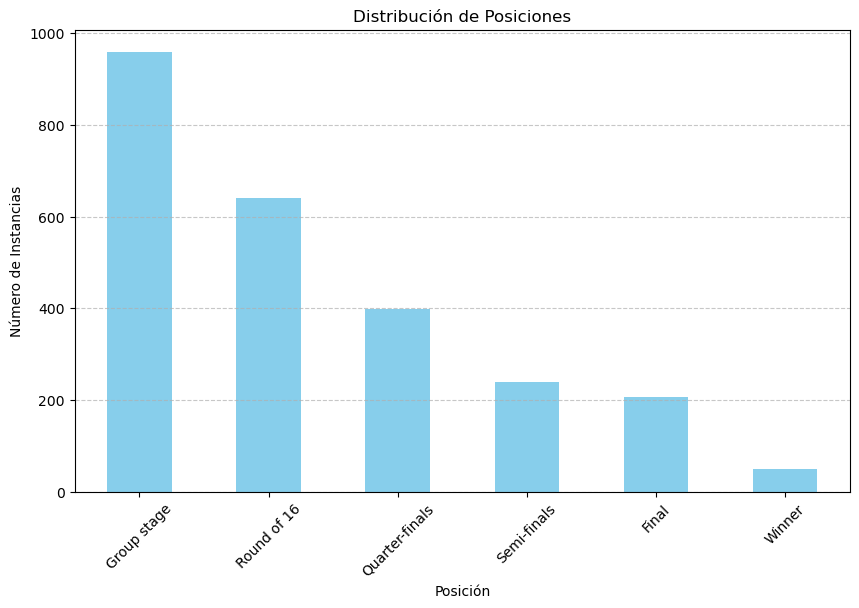

Conteo de instancias para cada posición:
Posicion
Group stage       960
Round of 16       640
Quarter-finals    399
Semi-finals       239
Final             207
Winner             49
Name: count, dtype: int64


In [64]:
# Contar el número de instancias para cada posición
conteo_posiciones = df['Posicion'].value_counts()

# Visualizar la distribución de las clases en un gráfico de barras
plt.figure(figsize=(10, 6))
conteo_posiciones.plot(kind='bar', color='skyblue')
plt.title('Distribución de Posiciones')
plt.xlabel('Posición')
plt.ylabel('Número de Instancias')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Imprimir el conteo de instancias para cada posición
print("Conteo de instancias para cada posición:")
print(conteo_posiciones)

### Modelos

In [65]:
from sklearn.model_selection import train_test_split

partido_features = df.drop(['Posicion', 'GolesLocal', 'GolesVisitante', 'VictoriaLocal', 'VictoriaVisitante', 'Empate'], axis=1).columns
objetivo = 'Posicion'

# Separate features and labels
partidos_X = df[partido_features].values
partidos_y = df[objetivo].values


# Split data 70%-30% into training set and test set
x_train, x_test, y_train, y_test = train_test_split(partidos_X, partidos_y,
                                                    test_size=0.30,
                                                    random_state=0,
                                                    stratify=partidos_y)

print ('Training Set: %d, Test Set: %d \n' % (x_train.shape[0], x_test.shape[0]))

Training Set: 1745, Test Set: 749 



In [66]:
from sklearn.linear_model import LogisticRegression

multi_model = LogisticRegression(solver='liblinear', max_iter=10000, class_weight='balanced')
multi_model.fit(x_train, y_train)
print (multi_model)

LogisticRegression(class_weight='balanced', max_iter=10000, solver='liblinear')


In [67]:
# Realizar predicciones en el conjunto de prueba
predictions = multi_model.predict(x_test)

# Imprimir las etiquetas predichas y las etiquetas reales para las primeras 15 muestras del conjunto de prueba
print('Etiquetas predichas:', predictions[:15])
print('Etiquetas reales:   ', y_test[:15])


Etiquetas predichas: ['Quarter-finals' 'Round of 16' 'Semi-finals' 'Final' 'Group stage'
 'Round of 16' 'Round of 16' 'Group stage' 'Round of 16' 'Round of 16'
 'Round of 16' 'Final' 'Group stage' 'Round of 16' 'Semi-finals']
Etiquetas reales:    ['Quarter-finals' 'Round of 16' 'Final' 'Final' 'Group stage'
 'Round of 16' 'Round of 16' 'Group stage' 'Round of 16' 'Round of 16'
 'Round of 16' 'Final' 'Group stage' 'Round of 16' 'Semi-finals']


Métricas de evaluación del modelo

In [68]:
from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

                precision    recall  f1-score   support

         Final       0.74      0.73      0.73        62
   Group stage       0.99      1.00      1.00       288
Quarter-finals       0.68      0.56      0.61       120
   Round of 16       0.81      0.91      0.86       192
   Semi-finals       0.72      0.65      0.69        72
        Winner       0.44      0.53      0.48        15

      accuracy                           0.84       749
     macro avg       0.73      0.73      0.73       749
  weighted avg       0.84      0.84      0.84       749



- Precision: Indica la proporción de predicciones positivas correctas (verdaderos positivos) sobre el total de predicciones positivas realizadas por el modelo. Por ejemplo, para la clase "Final", el modelo tiene una precisión del 66%, lo que significa que el 66% de las veces que el modelo predijo la clase "Final", fue correcta.

- Recall (Recuperación o Sensibilidad): Mide la proporción de verdaderos positivos sobre el total de muestras que realmente pertenecen a la clase dada. Para la clase "Round of 16", el modelo tiene un recall del 98%, lo que indica que el 98% de las veces que una muestra realmente pertenecía a la clase "Round of 16", el modelo la identificó correctamente.

- F1: Es la media armónica de precision y recall. Es útil cuando las clases están desequilibradas.

- Accuracy (Precisión global): Es la proporción de predicciones correctas sobre el total de predicciones realizadas por el modelo. En este caso, el modelo tiene una precisión global del 78%.

- Macro avg (Promedio macro): Es el promedio sin ponderar de precision, recall y f1-score sobre todas las clases.

- Weighted avg (Promedio ponderado): Es el promedio ponderado de precision, recall y f1-score sobre todas las clases, ponderado por el número de muestras en cada clase.



In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))


Overall Accuracy: 0.8411214953271028
Overall Precision: 0.7308804326304797
Overall Recall: 0.7302848715651136


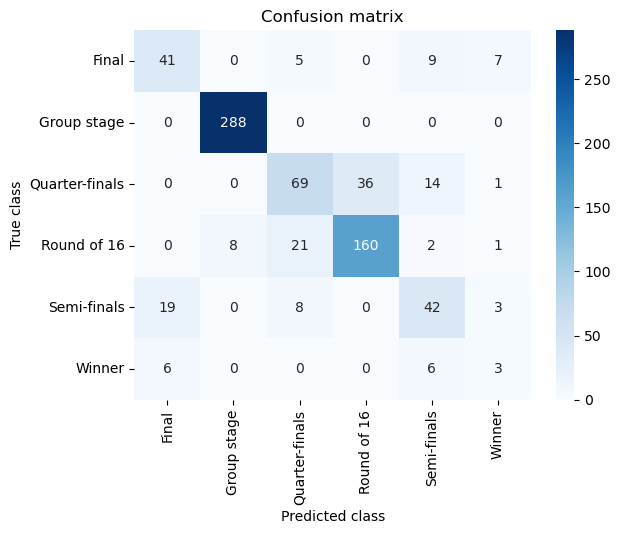

                precision    recall  f1-score   support

         Final       0.62      0.66      0.64        62
   Group stage       0.97      1.00      0.99       288
Quarter-finals       0.67      0.57      0.62       120
   Round of 16       0.82      0.83      0.82       192
   Semi-finals       0.58      0.58      0.58        72
        Winner       0.20      0.20      0.20        15

      accuracy                           0.81       749
     macro avg       0.64      0.64      0.64       749
  weighted avg       0.80      0.81      0.80       749



In [101]:
from sklearn.metrics import confusion_matrix

posicion_classes = ['Final', 'Group stage', 'Quarter-finals', 'Round of 16', 'Semi-finals', 'Winner']

def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    sns.heatmap(conf_matrix, cmap='Blues', xticklabels=posicion_classes, yticklabels=posicion_classes, annot=True, fmt="d")
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

mostrar_resultados(y_test, predictions)

En el caso de un modelo de clasificación multiclase, no es posible mostrar una única curva ROC que muestre la tasa de verdaderos positivos frente a la tasa de falsos positivos. Sin embargo, puedes utilizar las tasas para cada clase en una comparación Uno vs. Resto (OVR) para crear un gráfico ROC para cada clase.

/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No po

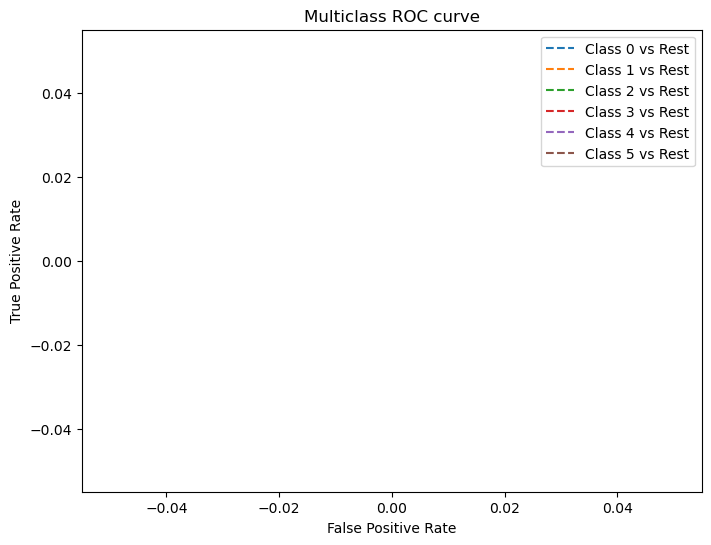

In [103]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Obtener las probabilidades de clase
partidos_prob = multi_model.predict_proba(x_test)

def plot_multiclass_roc(model, x_test, y_test, classes=None):
     # Obtener métricas ROC para cada clase
    fpr = {}
    tpr = {}
    thresh = {}
    for i in range(len(model.classes_)):    
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test, partidos_prob[:, i], pos_label=i)
    
    # Trazar la curva ROC
    plt.figure(figsize=(8, 6))
    for i in range(len(model.classes_)):
        plt.plot(fpr[i], tpr[i], linestyle='--', label='Class {} vs Rest'.format(i))
    
    # Añadir etiquetas y leyenda
    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    
    # Añadir etiquetas de clase si se proporcionan
    if classes:
        plt.xticks(range(len(classes)), classes)
    
    # Mostrar la gráfica
    plt.show()

# Usar la función para plotear la curva ROC
plot_multiclass_roc(multi_model, x_test, y_test)

In [104]:
auc = roc_auc_score(y_test, partidos_prob, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 0.9672989321303879


Promedio de los AUC obtenidos para cada clase individualmente mediante un enfoque OVR, en este caso sugiere que el modelo tiene un buen rendimiento en términos de capacidad discriminativa en general.

### Random Forest

Accuracy: 0.9719626168224299

Classification Report:
                precision    recall  f1-score   support

         Final       0.82      0.90      0.86        62
   Group stage       1.00      1.00      1.00       288
Quarter-finals       0.94      1.00      0.97       120
   Round of 16       1.00      0.99      0.99       192
   Semi-finals       0.97      0.93      0.95        72
        Winner       1.00      0.47      0.64        15

      accuracy                           0.97       749
     macro avg       0.96      0.88      0.90       749
  weighted avg       0.97      0.97      0.97       749



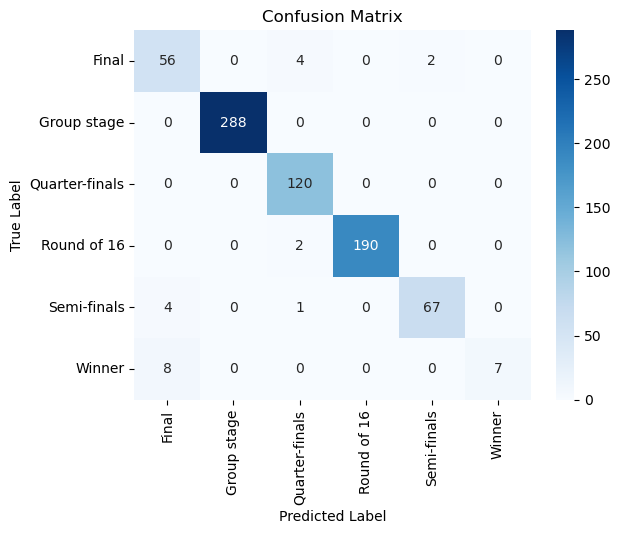

/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No po

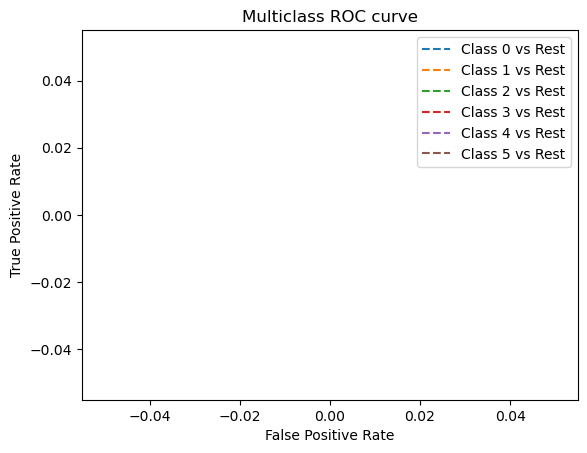

In [74]:
from sklearn.ensemble import RandomForestClassifier


# Crear y entrenar el modelo Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(x_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = random_forest_model.predict(x_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Mostrar el reporte de clasificación
print("\nClassification Report:")
print(classification_report(y_test, predictions))

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)

# Mostrar la matriz de confusión utilizando seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=posicion_classes, yticklabels=posicion_classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Obtener las probabilidades de clase
partidos_prob = random_forest_model.predict_proba(x_test)

# Obtener métricas ROC para cada clase
fpr = {}
tpr = {}
thresh = {}
for i in range(len(random_forest_model.classes_)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, partidos_prob[:, i], pos_label=i)
    
# Trazar la curva ROC
for i in range(len(random_forest_model.classes_)):
    plt.plot(fpr[i], tpr[i], linestyle='--', label='Class {} vs Rest'.format(i))

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()


Con este modelo vemos que los resultados mejoran. Ahora voy a probar con Gradient Boosting este modelo puede ser bueno para mi trabajo.

#### Gradient Boosting

Accuracy: 0.9853137516688919
Classification Report:
                 precision    recall  f1-score   support

         Final       0.94      0.94      0.94        62
   Group stage       0.99      1.00      1.00       288
Quarter-finals       0.96      1.00      0.98       120
   Round of 16       1.00      0.99      0.99       192
   Semi-finals       1.00      0.96      0.98        72
        Winner       1.00      0.87      0.93        15

      accuracy                           0.99       749
     macro avg       0.98      0.96      0.97       749
  weighted avg       0.99      0.99      0.99       749



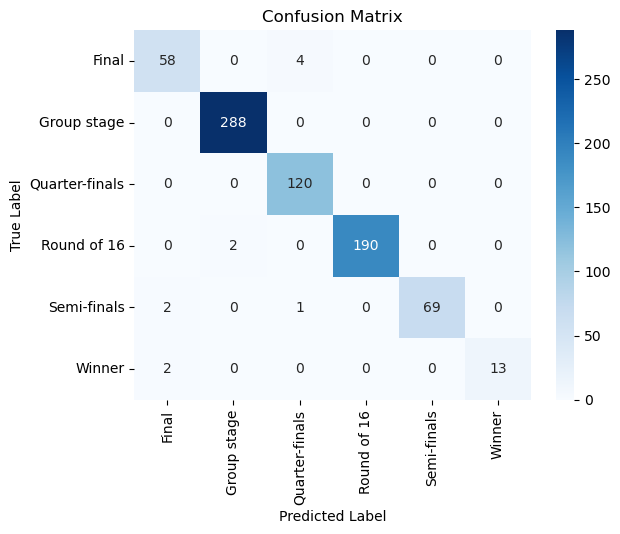

/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No po

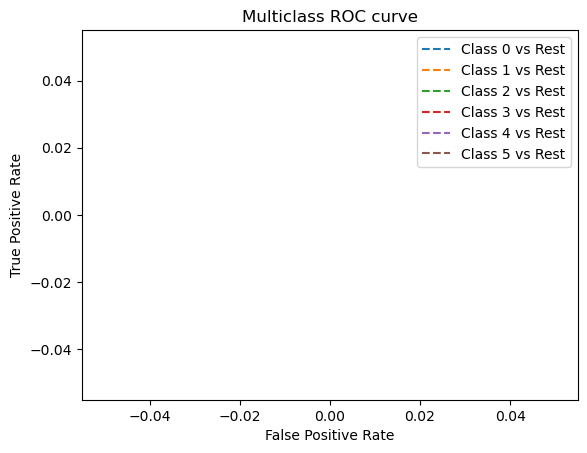

/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No po

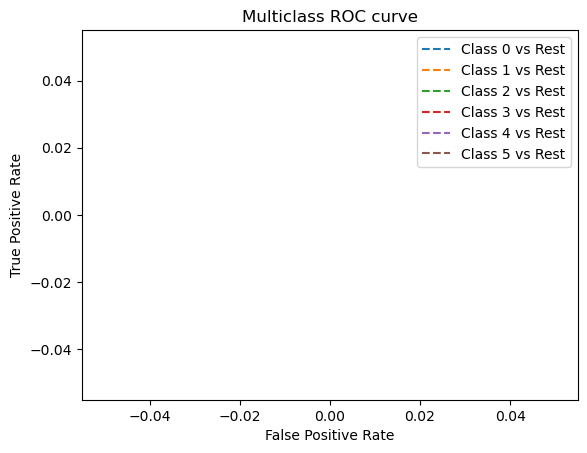

In [75]:
from sklearn.ensemble import GradientBoostingClassifier



# Inicializar el modelo Gradient Boosting con los pesos de muestra
modelo_gb = GradientBoostingClassifier(n_estimators=100)

# Ajustar el modelo Gradient Boosting con los pesos de muestra
modelo_gb.fit(x_train, y_train)

# Realizar predicciones
predicciones = modelo_gb.predict(x_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, predicciones)
print("Accuracy:", precision)

# Mostrar el informe de clasificación
print("Classification Report:\n", classification_report(y_test, predicciones))

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predicciones)

# Mostrar la matriz de confusión utilizando seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=posicion_classes, yticklabels=posicion_classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Obtener las probabilidades de clase
partidos_prob = modelo_gb.predict_proba(x_test)

# Obtener métricas ROC para cada clase
fpr = {}
tpr = {}
thresh = {}
for i in range(len(modelo_gb.classes_)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, partidos_prob[:, i], pos_label=i)
    
# Trazar la curva ROC
for i in range(len(modelo_gb.classes_)):
    plt.plot(fpr[i], tpr[i], linestyle='--', label='Class {} vs Rest'.format(i))

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()


# Obtener las probabilidades de clase
partidos_prob = modelo_gb.predict_proba(x_test)

# Obtener métricas ROC para cada clase
fpr = {}
tpr = {}
thresh = {}
for i in range(len(modelo_gb.classes_)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, partidos_prob[:, i], pos_label=i)
    
# Trazar la curva ROC
for i in range(len(modelo_gb.classes_)):
    plt.plot(fpr[i], tpr[i], linestyle='--', label='Class {} vs Rest'.format(i))

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()


### Preprocesamiento de los datos

Escalaré los datos con un pipeline y utilizaré los mismo modelos anteriores a ver si mis resultados mejoran. Además también utilizaré SVM, un algoritmo de aprendizaje supervisado. Su objetivo principal en la clasificación es encontrar un hiperplano en un espacio multidimensional que separe de la mejor manera posible las diferentes clases de datos. Este hiperplano se define de manera que maximiza la distancia entre los puntos más cercanos de las clases, conocidos como vectores de soporte.

In [76]:
df.head()

,idPartido,Local,Visitante,GolesLocal,GolesVisitante,VictoriaLocal,Empate,VictoriaVisitante,%_Victorias_Local,%_Empate,...,%_2_G_Temporada,%_2_G_Temporada_L,%_2_E_Temporada_L,%_2_P_Temporada_L,2_Media_G,2_Media_G_Local,2_Media_Goles_PP,2_ValorJugadores,2_MediaJugadores,Posicion
0,121,235,11,1,0,1,0,0,100.0,0.0,...,55.56,60.00,20.00,20.00,0.56,0.60,1.33,685.188968,26.353422,Group stage
1,122,14,153,3,0,1,0,0,0.0,100.0,...,0.00,0.00,100.00,0.00,0.00,0.00,0.20,356.128703,14.245148,Round of 16
2,123,15,1,0,3,0,0,1,100.0,0.0,...,63.64,83.33,16.67,0.00,0.64,0.83,2.09,796.271706,36.194168,Group stage
3,124,10,298,2,0,1,0,0,0.0,0.0,...,20.00,33.33,0.00,66.67,0.20,0.33,1.40,382.737487,19.136874,Quarter-finals
4,125,184,2,1,1,0,1,0,100.0,0.0,...,45.45,66.67,0.00,33.33,0.45,0.67,1.27,749.233912,32.575387,Group stage


In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

columnas_a_escalar = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, columnas_a_escalar)])

#pipeline con svc
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', SVC(probability=True))])


multi_model_SVC = pipeline.fit(x_train, y_train)
print (multi_model_SVC)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [3, 4, 5, 6, 7, 8, 9, 10, 11,
                                                   12, 13, 14, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23, 24,
                                                   25])])),
                ('regressor', SVC(probability=True))])


Overall Accuracy: 0.8918558077436582
Overall Precision: 0.6735490285298907
Overall Recall: 0.6917973416965353
Average AUC: 0.9808193353642424


/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


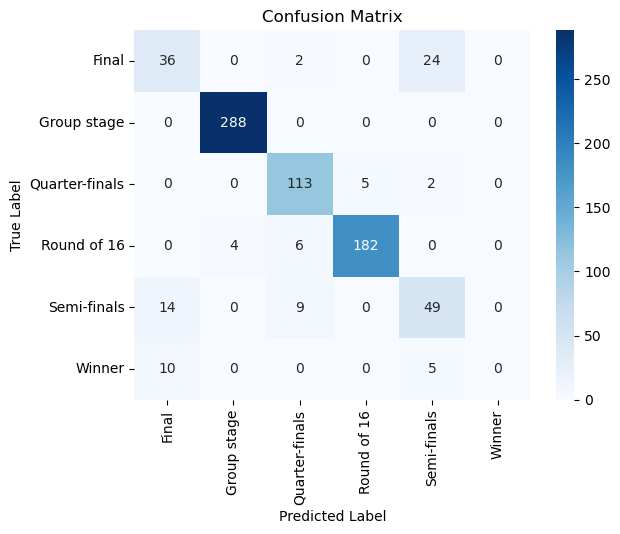

/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No po

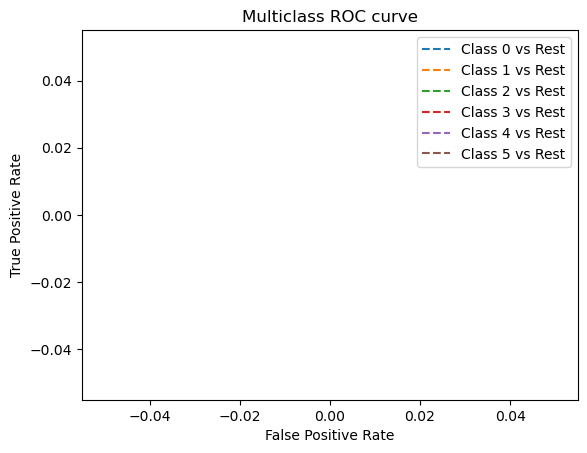

In [78]:
#Evaluación del modelo SVC con pipeline
# Get predictions from test data
predictions = multi_model_SVC.predict(x_test)
partidos_prob = multi_model_SVC.predict_proba(x_test)

# Overall metrics
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))
print('Average AUC:', roc_auc_score(y_test,partidos_prob, multi_class='ovr'))

m = confusion_matrix(y_test, predictions)
# Mostrar la matriz de confusión utilizando seaborn
sns.heatmap(m, annot=True, fmt='d', cmap='Blues', xticklabels=posicion_classes, yticklabels=posicion_classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Obtener métricas ROC para cada clase
fpr = {}
tpr = {}
thresh = {}
for i in range(len(multi_model_SVC.classes_)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, partidos_prob[:, i], pos_label=i)
    
# Trazar la curva ROC
for i in range(len(multi_model_SVC.classes_)):
    plt.plot(fpr[i], tpr[i], linestyle='--', label='Class {} vs Rest'.format(i))

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [3, 4, 5, 6, 7, 8, 9, 10, 11,
                                                   12, 13, 14, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23, 24,
                                                   25])])),
                ('regressor',
                 RandomForestClassifier(min_samples_leaf=4,
                                        min_samples_split=10, n_estimators=200,
                                        random_state=42))])
Overall Accuracy: 0.9586114819759679
Overall Precision: 0.9369002167623409
Overall Recall: 0.8049992532855437
Average AUC: 0.9940405269347491


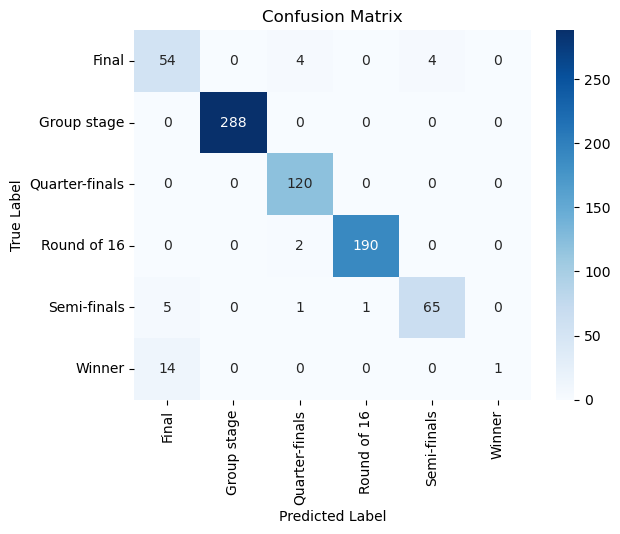

/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No po

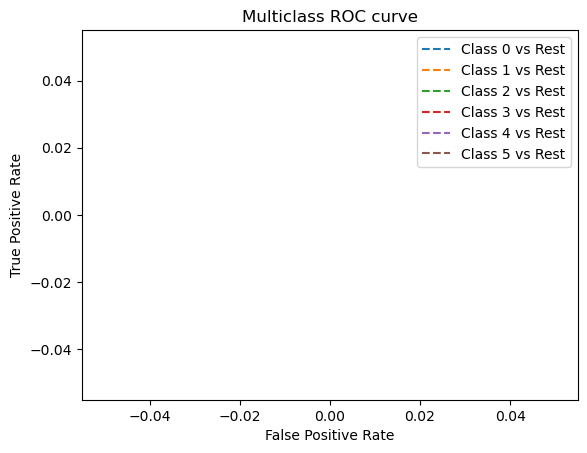

In [79]:
#pipeline con random forest
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestClassifier(n_estimators=200, min_samples_split=10, min_samples_leaf=4, random_state=42))])

multi_model_RF = pipeline.fit(x_train, y_train)
print (multi_model_RF)

#Evaluación del modelo Random Forest con pipeline
# Get predictions from test data
predictions = multi_model_RF.predict(x_test)
partidos_prob = multi_model_RF.predict_proba(x_test)

# Overall metrics
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))
print('Average AUC:', roc_auc_score(y_test,partidos_prob, multi_class='ovr'))

m = confusion_matrix(y_test, predictions)
# Mostrar la matriz de confusión utilizando seaborn
sns.heatmap(m, annot=True, fmt='d', cmap='Blues', xticklabels=posicion_classes, yticklabels=posicion_classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Obtener métricas ROC para cada clase
fpr = {}
tpr = {}
thresh = {}
for i in range(len(multi_model_RF.classes_)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, partidos_prob[:, i], pos_label=i)
    
# Trazar la curva ROC
for i in range(len(multi_model_RF.classes_)):
    plt.plot(fpr[i], tpr[i], linestyle='--', label='Class {} vs Rest'.format(i))

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [3, 4, 5, 6, 7, 8, 9, 10, 11,
                                                   12, 13, 14, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23, 24,
                                                   25])])),
                ('regressor', GradientBoostingClassifier())])
Overall Accuracy: 0.9879839786381842
Overall Precision: 0.9813961426864651
Overall Recall: 0.9424880525686977
Average AUC: 0.9940405269347491


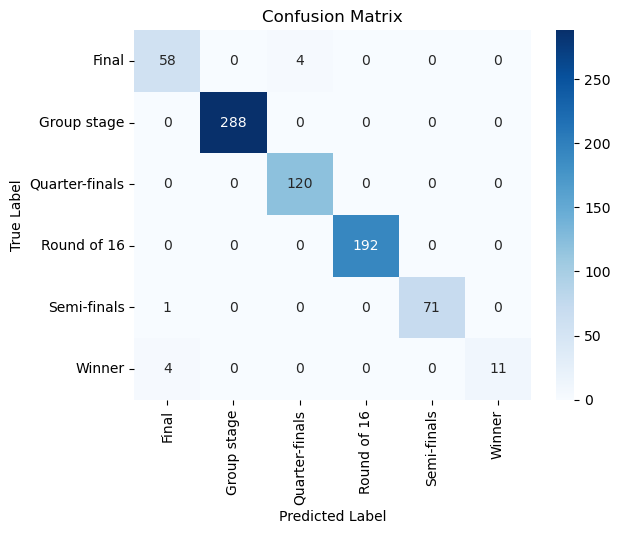

/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No po

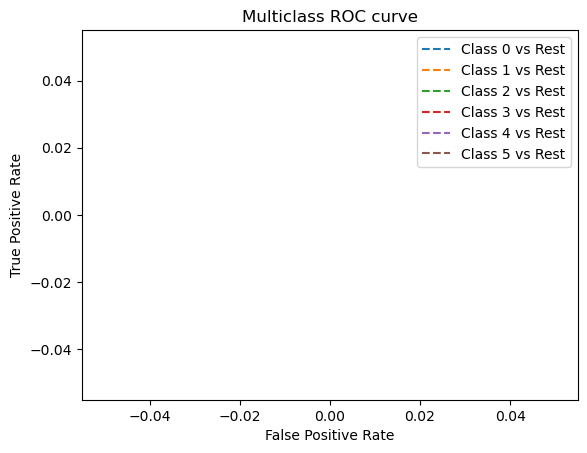

In [80]:
#pipeline con gradient boosting
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingClassifier())])

multi_model_GB = pipeline.fit(x_train, y_train)
print (multi_model_GB)

#Evaluación del modelo Gradient Boosting con pipeline
# Get predictions from test data
predictions = multi_model_GB.predict(x_test)
partidos_prob_prob = multi_model_GB.predict_proba(x_test)

# Overall metrics
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))
print('Average AUC:', roc_auc_score(y_test,partidos_prob, multi_class='ovr'))

m = confusion_matrix(y_test, predictions)
# Mostrar la matriz de confusión utilizando seaborn
sns.heatmap(m, annot=True, fmt='d', cmap='Blues', xticklabels=posicion_classes, yticklabels=posicion_classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Obtener métricas ROC para cada clase
fpr = {}
tpr = {}
thresh = {}
for i in range(len(multi_model_GB.classes_)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, partidos_prob[:, i], pos_label=i)
    
# Trazar la curva ROC
for i in range(len(multi_model_GB.classes_)):
    plt.plot(fpr[i], tpr[i], linestyle='--', label='Class {} vs Rest'.format(i))

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [3, 4, 5, 6, 7, 8, 9, 10, 11,
                                                   12, 13, 14, 15, 16, 17, 18,
                                                   19, 20, 21, 22, 23, 24,
                                                   25])])),
                ('regressor', GradientBoostingClassifier())])
Overall Accuracy: 0.8050734312416555
Overall Precision: 0.6426261671953539
Overall Recall: 0.6421594982078854
Average AUC: 0.9940405269347491


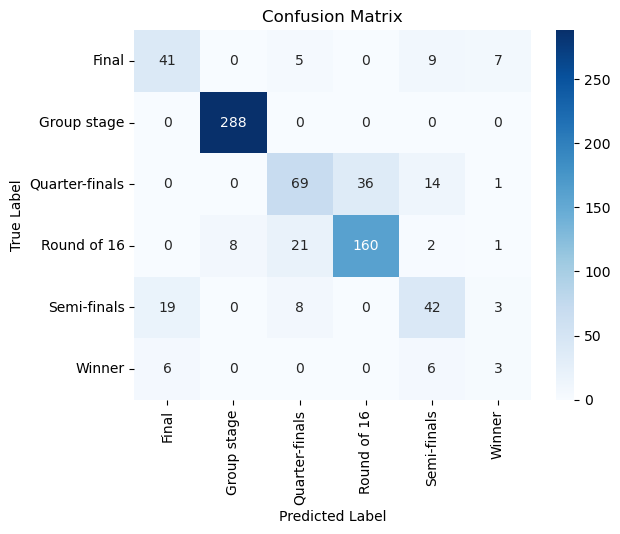

/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No po

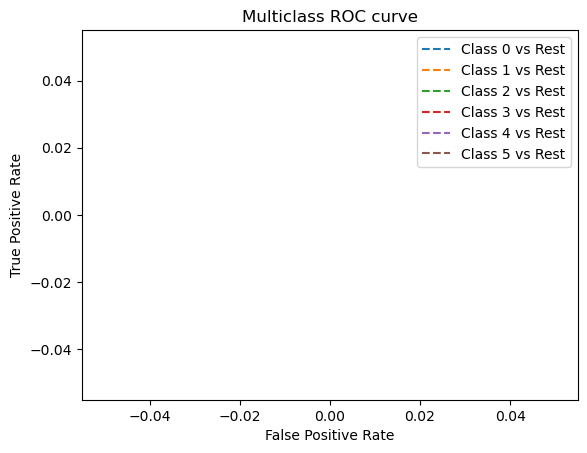

In [81]:
#pipeline con gradient boosting
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LogisticRegression(solver='liblinear', max_iter=10000, class_weight='balanced'))])

multi_model_LR = pipeline.fit(x_train, y_train)
print (multi_model_GB)

#Evaluación del modelo Gradient Boosting con pipeline
# Get predictions from test data
predictions = multi_model_LR.predict(x_test)
partidos_prob_prob = multi_model_LR.predict_proba(x_test)

# Overall metrics
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))
print('Average AUC:', roc_auc_score(y_test,partidos_prob, multi_class='ovr'))

m = confusion_matrix(y_test, predictions)
# Mostrar la matriz de confusión utilizando seaborn
sns.heatmap(m, annot=True, fmt='d', cmap='Blues', xticklabels=posicion_classes, yticklabels=posicion_classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Obtener métricas ROC para cada clase
fpr = {}
tpr = {}
thresh = {}
for i in range(len(multi_model_LR.classes_)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, partidos_prob[:, i], pos_label=i)
    
# Trazar la curva ROC
for i in range(len(multi_model_LR.classes_)):
    plt.plot(fpr[i], tpr[i], linestyle='--', label='Class {} vs Rest'.format(i))

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

In [82]:
'''Evalaución de todos los modelos escalados, ya que tienen mejor rendimiento'''


modelos = {'LR sin pre': multi_model,
           'RF sin pre': random_forest_model,
            'GB sin pre': modelo_gb,
            'Logistic Regression': multi_model_LR,
          'Random Forest': multi_model_RF,
          'Gradient Boosting': multi_model_GB,
          'SVM': multi_model_SVC}

# Crear un diccionario para almacenar las métricas de cada modelo
metricas = {}

# Iterar sobre cada modelo
for nombre, modelo in modelos.items():
    # Entrenar el modelo
    modelo.fit(x_train, y_train)
    
    # Realizar predicciones en el conjunto de prueba
    predicciones = modelo.predict(x_test)
    predicciones_proba = modelo.predict_proba(x_test)
    
    # Calcular las métricas
    accuracy = accuracy_score(y_test, predicciones)
    precision = precision_score(y_test, predicciones, average='macro',zero_division=1)
    recall = recall_score(y_test, predicciones, average='macro')
    roc_auc = roc_auc_score(y_test, predicciones_proba, multi_class='ovr')
    
    # Almacenar las métricas en el diccionario
    metricas[nombre] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'AUC': roc_auc}

# Crear un DataFrame a partir del diccionario de métricas
df_metricas = pd.DataFrame.from_dict(metricas, orient='index')

# Imprimir el DataFrame
df_metricas


,Accuracy,Precision,Recall,AUC
LR sin pre,0.841121,0.730880,0.730285,0.967299
RF sin pre,0.971963,0.956571,0.881672,0.997283
GB sin pre,0.985314,0.981431,0.958345,0.999043
Logistic Regression,0.805073,0.642626,0.642159,0.952501
Random Forest,0.958611,0.936900,0.804999,0.994041
Gradient Boosting,0.987984,0.981396,0.942488,0.999421
SVM,0.891856,0.840216,0.691797,0.980948


Basándonos en estas métricas, podemos observar que el modelo de Gradient Boosting tiene el mejor desempeño general en términos de precisión, recall, accuracy y ROC AUC en comparación con los otros modelos.

In [83]:
#Voy a guardar los modelos para usarlos para predecir resultados de otros partidos
import joblib

# Guardar los modelos en un archivo
joblib.dump(multi_model_LR, 'modelos/multi_model2_LR.pkl')
joblib.dump(multi_model_RF, 'modelos/multi_model2_RF.pkl')
joblib.dump(multi_model_GB, 'modelos/multi_model2_GB.pkl')
joblib.dump(multi_model_SVC, 'modelos/multi_model2_SVC.pkl')


['modelos/multi_model2_SVC.pkl']

In [84]:
#Cargo el data que quiero usar para las predicciones y me quedo con lo que necesito
data = pd.read_csv('dataframe/champions_23_24.csv', header=None, skiprows=1)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1,2023-01-01,Group stage,2,307,Stadio Giuseppe Meazza,0,0,0,1,...,16.423147,20.00,33.33,0.00,66.67,0.20,0.33,1.20,385.648621,16.767331
1,2,2023-01-01,Group stage,67,68,Stadion Wankdorf,1,3,0,0,...,15.543811,42.86,50.00,0.00,50.00,0.43,0.50,1.57,497.803882,21.643647
2,3,2023-01-01,Group stage,16,20,Etihad Stadium,3,1,1,0,...,23.287028,0.00,0.00,33.33,66.67,0.00,0.00,1.20,374.821246,17.037329
3,4,2023-01-01,Group stage,28,14,Parc des Princes,2,0,1,0,...,26.475023,44.44,40.00,60.00,0.00,0.44,0.40,1.11,501.021450,21.783541
4,5,2023-01-01,Group stage,99,24,Stadio Olimpico,1,1,0,1,...,24.959872,44.44,60.00,20.00,20.00,0.44,0.60,2.00,550.408580,25.018572


In [85]:
data = data.drop([1, 2, 5, 6, 7, 8, 9, 10], axis=1)
data.head()

,0,3,4,11,12,13,14,15,16,17,...,24,25,26,27,28,29,30,31,32,33
0,1,2,307,0.00,0.00,100.0,100.00,0.00,40.00,50.0,...,16.423147,20.00,33.33,0.00,66.67,0.20,0.33,1.20,385.648621,16.767331
1,2,67,68,100.00,0.00,0.0,0.00,100.00,20.00,50.0,...,15.543811,42.86,50.00,0.00,50.00,0.43,0.50,1.57,497.803882,21.643647
2,3,16,20,0.00,0.00,100.0,100.00,0.00,77.78,75.0,...,23.287028,0.00,0.00,33.33,66.67,0.00,0.00,1.20,374.821246,17.037329
3,4,28,14,66.67,33.33,0.0,33.33,33.33,33.33,50.0,...,26.475023,44.44,40.00,60.00,0.00,0.44,0.40,1.11,501.021450,21.783541
4,5,99,24,100.00,0.00,0.0,0.00,100.00,57.14,100.0,...,24.959872,44.44,60.00,20.00,20.00,0.44,0.60,2.00,550.408580,25.018572


In [86]:
#Predicciones con LR
multi_model_2LR = joblib.load('modelos/multi_model2_LR.pkl')

predicciones = multi_model_2LR.predict(data)
nuevo_data = data.iloc[:, [1]].copy()  # Selecciona las columnas 3 y 4 del DataFrame original
nuevo_data['LR'] = predicciones  # Agrega las predicciones como una nueva columna

nuevo_data.tail(8)

,3,LR
112,31,Round of 16
113,1,Round of 16
114,24,Round of 16
115,28,Quarter-finals
116,5,Round of 16
117,14,Round of 16
118,16,Round of 16
119,3,Round of 16


In [87]:
#Predicciones con LR
multi_model2_RF = joblib.load('modelos/multi_model2_RF.pkl')
predicciones_RF = multi_model2_RF.predict(data)
nuevo_data['RF'] = predicciones_RF

# Imprimir las últimas 8 filas de las columnas seleccionadas
nuevo_data.tail(8)

,3,LR,RF
112,31,Round of 16,Round of 16
113,1,Round of 16,Round of 16
114,24,Round of 16,Quarter-finals
115,28,Quarter-finals,Quarter-finals
116,5,Round of 16,Round of 16
117,14,Round of 16,Round of 16
118,16,Round of 16,Round of 16
119,3,Round of 16,Round of 16


In [88]:
#Predicciones con GB
multi_model2_GB = joblib.load('modelos/multi_model2_GB.pkl')
predicciones_GB = multi_model2_GB.predict(data)
nuevo_data['GB'] = predicciones_GB

nuevo_data.tail(8)

,3,LR,RF,GB
112,31,Round of 16,Round of 16,Round of 16
113,1,Round of 16,Round of 16,Round of 16
114,24,Round of 16,Quarter-finals,Round of 16
115,28,Quarter-finals,Quarter-finals,Round of 16
116,5,Round of 16,Round of 16,Round of 16
117,14,Round of 16,Round of 16,Round of 16
118,16,Round of 16,Round of 16,Round of 16
119,3,Round of 16,Round of 16,Round of 16


In [89]:
#Predicciones con SVC
multi_model2_SVC = joblib.load('modelos/multi_model2_SVC.pkl')
predicciones_SVC = multi_model2_SVC.predict(data)
nuevo_data['SVC'] = predicciones_SVC

nuevo_data.tail(8)

,3,LR,RF,GB,SVC
112,31,Round of 16,Round of 16,Round of 16,Round of 16
113,1,Round of 16,Round of 16,Round of 16,Round of 16
114,24,Round of 16,Quarter-finals,Round of 16,Round of 16
115,28,Quarter-finals,Quarter-finals,Round of 16,Round of 16
116,5,Round of 16,Round of 16,Round of 16,Round of 16
117,14,Round of 16,Round of 16,Round of 16,Round of 16
118,16,Round of 16,Round of 16,Round of 16,Round of 16
119,3,Round of 16,Round of 16,Round of 16,Round of 16


In [92]:
import json

# Cargar el JSON que contiene la correspondencia entre IDs de equipos y nombres
with open('dataframe/id_equipo.json', 'r') as f:
    id_equipos = json.load(f)




In [98]:
# Crear un diccionario para facilitar el mapeo
id_to_equipo = {str(value): key for key, value in id_equipos.items()}

# Reemplazar los IDs de equipos en las columnas correspondientes de nuevo_data con los nombres de los equipos
nuevo_data[3] = nuevo_data[3].astype(str).map(id_to_equipo)
nuevo_data.drop(columns=[3])

# Imprimir las últimas 8 filas con los nombres de los equipos en lugar de los IDs
nuevo_data.tail(8)

,3,LR,RF,GB,SVC,Equipo
112,NaN,Round of 16,Round of 16,Round of 16,Round of 16,Arsenal
113,NaN,Round of 16,Round of 16,Round of 16,Round of 16,Real Madrid
114,NaN,Round of 16,Quarter-finals,Round of 16,Round of 16,Atlético de Madrid
115,NaN,Quarter-finals,Quarter-finals,Round of 16,Round of 16,PSG
116,NaN,Round of 16,Round of 16,Round of 16,Round of 16,Barcelona
117,NaN,Round of 16,Round of 16,Round of 16,Round of 16,Borussia Dortmund
118,NaN,Round of 16,Round of 16,Round of 16,Round of 16,Manchester City
119,NaN,Round of 16,Round of 16,Round of 16,Round of 16,Bayern München
